In [292]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [293]:
# function for normalizing the values
def normalize(x):
    return (x - np.mean(x) / np.std(x))

In [294]:
# class function for linear regression
class Prediction:
    
    
    def __init__(self, iterations, alpha):
        self.iterations = iterations
        self.alpha = alpha
        
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.m, self.n = self.x.shape
        self.w = np.zeros(self.n)
        self.b = 0
        
        y_pred = np.dot(self.x, self.w) + self.b
        
        for i in range(self.iterations):
            y_pred = np.dot(self.x, self.w) + self.b
            dw = (1 / self.m) * np.dot(self.x.T, (y_pred - self.y))
            db = (1 / self.m) * np.sum(y_pred - self.y)
            self.w -= self.alpha * dw
            self.b -= self.alpha * db
            
    
    def pred(self, g):
        self.g = g
        y_pred = (np.dot(self.g, self.w) + self.b)
        return y_pred
    
    
    def cost(self, e):
        y_pred = np.dot(self.g, self.w) + self.b
        c = []
        v = []
        for i in range(self.iterations):
            k = (1 / self.m) * np.sum((y_pred - self.e) ** 2)
            c.append(k)
            v.append(i)
        return c, v

In [295]:
# readin and dropping the NaN values
df = pd.read_csv('london_house_prices.csv')
d = df.dropna()
d


,id,bedrooms,bathrooms,tenure,garden,street,size_sqft,price_pounds,nearest_station_name,nearest_station_miles,postcode_outer
6,124365635,6.0,6.0,freehold,1,"Chesterfield Hill, London, W1J",4460.0,10950000,Green Park Station,0.3,W1J
9,125069459,6.0,6.0,freehold,1,"Wilton Street, Belgravia, SW1X",4563.0,11750000,Hyde Park Corner Station,0.3,SW1X
15,124365635,6.0,6.0,freehold,1,"Chesterfield Hill, London, W1J",4460.0,10950000,Green Park Station,0.3,W1J
18,125069459,6.0,6.0,freehold,1,"Wilton Street, Belgravia, SW1X",4563.0,11750000,Hyde Park Corner Station,0.3,SW1X
21,133352759,5.0,4.0,leasehold,0,"Chelsea Creek Tower, Chelsea Creek, SW6",3599.0,6500000,Imperial Wharf Station,0.1,SW6
...,...,...,...,...,...,...,...,...,...,...,...
924,110096858,6.0,6.0,leasehold,1,"Chester Square, Belgravia SW1W",7005.0,22000000,Victoria Station,0.2,SW1W
925,130891463,7.0,7.0,freehold,1,"Elgin Avenue, Maida Vale, London, W9",6138.0,10000000,Maida Vale Station,0.2,W9
927,130410158,3.0,3.0,leasehold,0,"Chesham Street, Belgravia, SW1X",1657.0,7150000,Sloane Square Station,0.2,SW1X
930,133510934,7.0,6.0,freehold,1,"Cheyne Place, Chelsea, London, SW3",0.0,14950000,Sloane Square Station,0.6,SW3


In [296]:
# imprting the comlumns and rows in the variables
y = np.array(d["price_pounds"])
y = normalize(y)

gn = d.drop(columns = 'id', axis = 1)
ng = gn.drop(columns = 'tenure', axis = 1)
gg = ng.drop(columns = 'garden', axis =1)
nn = gg.drop(columns = 'street', axis = 1)
ggn = nn.drop(columns = 'nearest_station_name', axis = 1)
x = ggn.drop(columns = 'postcode_outer', axis = 1)

# normalizing the values
from sklearn.preprocessing import StandardScaler
gf = StandardScaler()
gf.fit(x)
standardized_data = gf.transform(x)
x = standardized_data


In [297]:
# splitting the dataset for training and testing using sklearn test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

<function matplotlib.pyplot.show(close=None, block=None)>

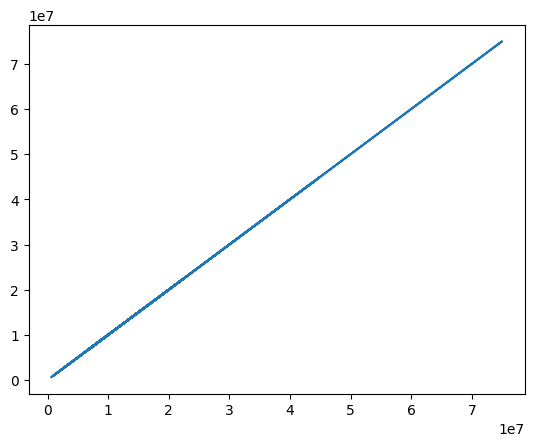

In [298]:
# predicting the prices of the house
pr = Prediction(10000, 0.01)
pr.fit(x, y)
y_pred = pr.pred(X_test)
c = []
v = []
#c, v = pr.cost(y)
plt.plot(y_test, y_pred)
plt.show

In [299]:
# finding the accuracy of the model
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 5) *100))


The accuracy of our model is 100.0%
